# <strong>**Telecom Churn Prediction Case Study** </strong>

## **Problem Statement**
In the highly competitive telecom industry, customers can easily switch between service providers, leading to an annual churn rate of **15-25%**. Given that acquiring a new customer costs **5-10 times more** than retaining an existing one, telecom companies must focus on customer retention. 

This case study focuses on prepaid customers in **India and Southeast Asia**, where churn is more challenging to detect since customers can stop using services without any formal notification. By leveraging customer usage data from previous months, we aim to predict which customers are likely to churn in the future.

## **Business Objective**
The objective of this project is to **predict customer churn in advance** and help telecom companies implement **proactive retention strategies**. Since **80% of revenue comes from the top 20% of customers**, we specifically focus on **high-value customers**, as their churn results in significant revenue loss.

### **Key Goals:**
- Define churn based on **usage behavior** (customers with zero usage in the churn month).  
- Identify **high-value customers** based on revenue metrics.  
- Use data from the past three months to predict churn in the fourth month.  
- Perform **Exploratory Data Analysis (EDA)** to understand customer behavior and key churn indicators.  
- Build and evaluate **machine learning models** to classify high-risk churn customers.  
- Provide **business recommendations** to reduce churn and improve customer retention.  

By identifying potential churners early, telecom companies can take **corrective actions** such as **offering discounts, better service plans, or personalized engagement strategies** to retain their most valuable customers.  


## Flow of Code
1. Reading and Understanding a Dataset
2. Checking and handling Missing Values
3. Filtering High Value Customers
4. Deriving new features
5. Data Visualisation
6. Data Preparation
7. Model Building
8. Recommendations

# <strong> 1. Reading and Understanding the Dataset

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Checking the shape of the dataset
df.shape

(99999, 226)

In [7]:
# chceking the info of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

>### Observation:>> - Dataset contains 99999 no of rows.
226 no of columns.There are 179 float ,35 int and 12 object type of columns.

In [9]:
# decsribing the dataset
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# <strong> 2. Checking and handling Missing Values

In [11]:
# Checking the missing values
df.isnull().mean()*100  # Missing values percentage in the dataset

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [12]:
# creating list of columns - seggregating date,categorical and recharge columns

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9' ,'date_of_last_rech_6', 'date_of_last_rech_7', 
             'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' , 'date_of_last_rech_data_9'] 

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9' ]

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9' ]



In [13]:
# Checking for recharge columns
df[recharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


>### Observation:
>> - Minimum recharge amount is 1 
>> - So the null values present in the columns that is due to people have not recharged (i.e recharge amount is zero)

In [15]:
# imputing the missing values with 0 for recharge columns

recharge_amt_cols = [ 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9' ]

df[recharge_amt_cols] = df[recharge_amt_cols].fillna(0)

In [16]:
# confirming that the missing values are imputed correctly
df[recharge_amt_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

>### Observation:
>> - recharge amount Columns are imputed correctly

In [18]:
# Checking for categorical columns
df[cat_cols].isna().mean()*100

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [19]:
# Imputing the missing values in categorical columns with -1

df[cat_cols] = df[cat_cols].fillna(-1)

In [20]:
# confirming that the missing values are imputed correctly
df[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [21]:
# Also dropping the date columns and id columns
df = df.drop(id_cols, axis=1)
df = df.drop(date_cols, axis=1)

In [22]:
# Checking the columns with more than 73% missing values
null_percent = df.isna().mean()*100

delete_cols = df.columns[null_percent > 73]

In [23]:
# Dropping the columns with more than 73% missing values
df = df.drop(delete_cols, axis=1)

In [24]:
# checking the shape of the dataset
df.shape

(99999, 196)

In [25]:
# checking the missing values in the dataset
df.isnull().mean()*100

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

### Imputing Missing value

In [27]:
# columns with missing values
missing_cols = df.columns[df.isnull().mean()>0]
missing_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)

In [28]:
df[missing_cols].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 119 columns):
 #    Column            Dtype  
---   ------            -----  
 0    loc_og_t2o_mou    float64
 1    std_og_t2o_mou    float64
 2    loc_ic_t2o_mou    float64
 3    onnet_mou_6       float64
 4    onnet_mou_7       float64
 5    onnet_mou_8       float64
 6    onnet_mou_9       float64
 7    offnet_mou_6      float64
 8    offnet_mou_7      float64
 9    offnet_mou_8      float64
 10   offnet_mou_9      float64
 11   roam_ic_mou_6     float64
 12   roam_ic_mou_7     float64
 13   roam_ic_mou_8     float64
 14   roam_ic_mou_9     float64
 15   roam_og_mou_6     float64
 16   roam_og_mou_7     float64
 17   roam_og_mou_8     float64
 18   roam_og_mou_9     float64
 19   loc_og_t2t_mou_6  float64
 20   loc_og_t2t_mou_7  float64
 21   loc_og_t2t_mou_8  float64
 22   loc_og_t2t_mou_9  float64
 23   loc_og_t2m_mou_6  float64
 24   loc_og_t2m_mou_7  float64
 25   loc_og_t2m_mou_8  fl

>### Observation:
>> - All the columns having missing values are containing numerical data
>> - So first we will identify column with continuous data and also will find columns with ordinal categorical data

In [30]:
# checking a unqiue values for columns having missing values

df[missing_cols].nunique().sort_values(ascending=True)

loc_og_t2o_mou          1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_og_t2c_mou_7        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_6        1
loc_ic_t2o_mou          1
std_og_t2o_mou          1
std_og_t2c_mou_6        1
spl_ic_mou_6           84
spl_ic_mou_8          102
spl_ic_mou_7          107
og_others_7           187
og_others_8           216
og_others_9           235
spl_ic_mou_9          384
og_others_6          1018
isd_og_mou_9         1255
isd_og_mou_8         1276
isd_og_mou_7         1380
isd_og_mou_6         1381
ic_others_6          1817
ic_others_8          1896
ic_others_9          1923
ic_others_7          2002
loc_og_t2c_mou_6     2235
std_og_t2f_mou_9     2295
loc_og_t2c_mou_9     2332
std_og_t2f_mou_8     2333
std_og_t2f_mou_7     2391
loc_og_t2c_mou_7     2426
std_og_t2f_mou_6     2450
loc_og_t2c_mou_8     2516
std_ic_t2f_mou_8     3051
std_ic_t2f_mou_9     3090
std_ic_t2f_mou_6     3125
std_ic_t2f_m

In [31]:
# Imputing the missing values in the columns with mode for the columns having less than 5 unique values

col_less_than_5_unique_val = df[missing_cols].nunique()[df[missing_cols].nunique() < 5].index
col_less_than_5_unique_val

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [32]:
df[col_less_than_5_unique_val] = df[col_less_than_5_unique_val].fillna(df[col_less_than_5_unique_val].mode().iloc[0])

In [33]:
# confirming that the missing values are imputed correctly
df[col_less_than_5_unique_val].isnull().sum()

loc_og_t2o_mou      0
std_og_t2o_mou      0
loc_ic_t2o_mou      0
std_og_t2c_mou_6    0
std_og_t2c_mou_7    0
std_og_t2c_mou_8    0
std_og_t2c_mou_9    0
std_ic_t2o_mou_6    0
std_ic_t2o_mou_7    0
std_ic_t2o_mou_8    0
std_ic_t2o_mou_9    0
dtype: int64

In [34]:
# for the remaining columns we will impute the missing values with median
col_with_missing_val = df.columns[df.isnull().mean()>0]
col_with_missing_val

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [35]:
# Imputing the missing values with median
df[col_with_missing_val] = df[col_with_missing_val].fillna(df[col_with_missing_val].median())

In [36]:
# confirming that the missing values are imputed correctly
df.isnull().sum().sum()

0

In [37]:
df.shape

(99999, 196)

>### Observation:
>> - All the missing values are imputed
>> - We have 99999 rows and 196 columns

# <strong> 3. Filtering High Value Customers

- We need to predict churn only for the high-value customers.
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

### Calculation for Total recharge amount
> - Total recharge amount = Total amount of recharge for Calling + (Total number of time Data recharge * Avg amount of recharge)

In [42]:
# Calculating the total recharge amount for June and July
df['total_amt_6'] = df['total_rech_amt_6'] + df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_amt_7'] = df['total_rech_amt_7'] + df['total_rech_data_7']*df['av_rech_amt_data_7']

In [43]:
# Calculating the average recharge amount for June and July i.e. Good phase
df['avg_amt_good_phase'] = (df['total_amt_6'] + df['total_amt_7'])/2

In [44]:
# Checking the 70th percentile of the average recharge amount
amt_70th_percentile = df['avg_amt_good_phase'].quantile(0.7)
amt_70th_percentile

478.0

In [45]:
# Creating Dataset for High Value Customers
df_high_val = df[df['avg_amt_good_phase'] > amt_70th_percentile]
df_high_val.shape

(29953, 199)

In [46]:
# Deleting the columns which are used for deriving the high value customers
df_high_val = df_high_val.drop(['total_amt_6', 'total_amt_7', 'avg_amt_good_phase'], axis=1)

>### Observation:
>> - We now have approximately 29.9K customers who have recharged with an amount greater than or equal to the recharge value of the 70th percentile customer.

# <strong> 4. Deriving new features

>### Calculating the difference between 8 month and previous months
>> - In this scenario, the most important feature could be the difference between the 8th month and the preceding months. This difference can manifest patterns such as usage variation or recharge value fluctuation. We will calculate the difference variable as the difference between the 8th month's value and the average of the 6th and 7th months.

In [50]:
# # Deriving the new features for the dataset

def derive_feature_differences(df, columns):
    for col in columns:
        df[f'{col}_diff'] = df[f'{col}_8'] - ((df[f'{col}_6'] + df[f'{col}_7']) / 2)
    return df

# Example usage:
columns = [
    'arpu', 'onnet_mou', 'roam_ic_mou', 'offnet_mou', 'roam_og_mou', 'loc_og_mou',
    'std_og_mou', 'isd_og_mou', 'total_og_mou', 'spl_og_mou', 'isd_ic_mou', 'loc_ic_mou',
    'std_ic_mou', 'spl_ic_mou', 'total_rech_num', 'total_ic_mou', 'total_rech_amt',
    'max_rech_amt', 'max_rech_data', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb'
]

df_high_val = derive_feature_differences(df_high_val, columns)
df_high_val.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,roam_ic_mou_diff,offnet_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,total_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_ic_mou_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252

- Now we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows:

- Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

In [52]:
# Deriving the churn column
df_high_val['churn'] = df_high_val.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 == 0 and x.vol_3g_mb_9 == 0) else 0, axis=1)

In [53]:
# Checking the columns for the month of September
cols_of_sep = df_high_val.columns[df_high_val.columns.str.endswith('_9')]
cols_of_sep

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')

In [54]:
# Dropping the columns for the month of September
df_high_val = df_high_val.drop(cols_of_sep, axis=1)

In [55]:
# Checking the shape of the dataset
df_high_val.shape

(29953, 173)

In [56]:
# Checking the churn rate

round(df_high_val['churn'].value_counts(normalize=True)*100, 2)

churn
0    91.88
1     8.12
Name: proportion, dtype: float64

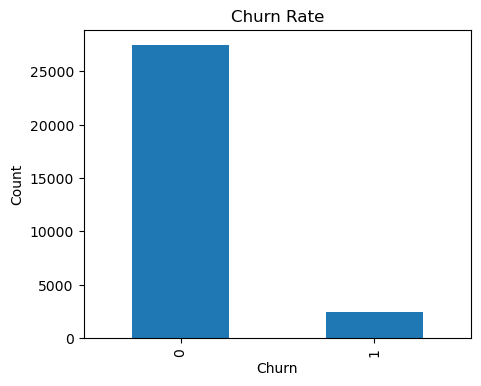

In [57]:
# Visualizing the churn rate
plt.figure(figsize=(5,4))
df_high_val['churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Rate')
plt.show()

>### Observation:
>> - Data is highly imbalanced as  among all customers only 8.12% customers are churners

# <strong> 5. Data Visualisation

## Univariate Analysis

In [61]:
# defining the columns for categorical and numerical columns
cat_cols = [col for col in df_high_val.columns if df_high_val[col].nunique() < 4]

num_cols = [col for col in df_high_val.columns if col not in cat_cols]

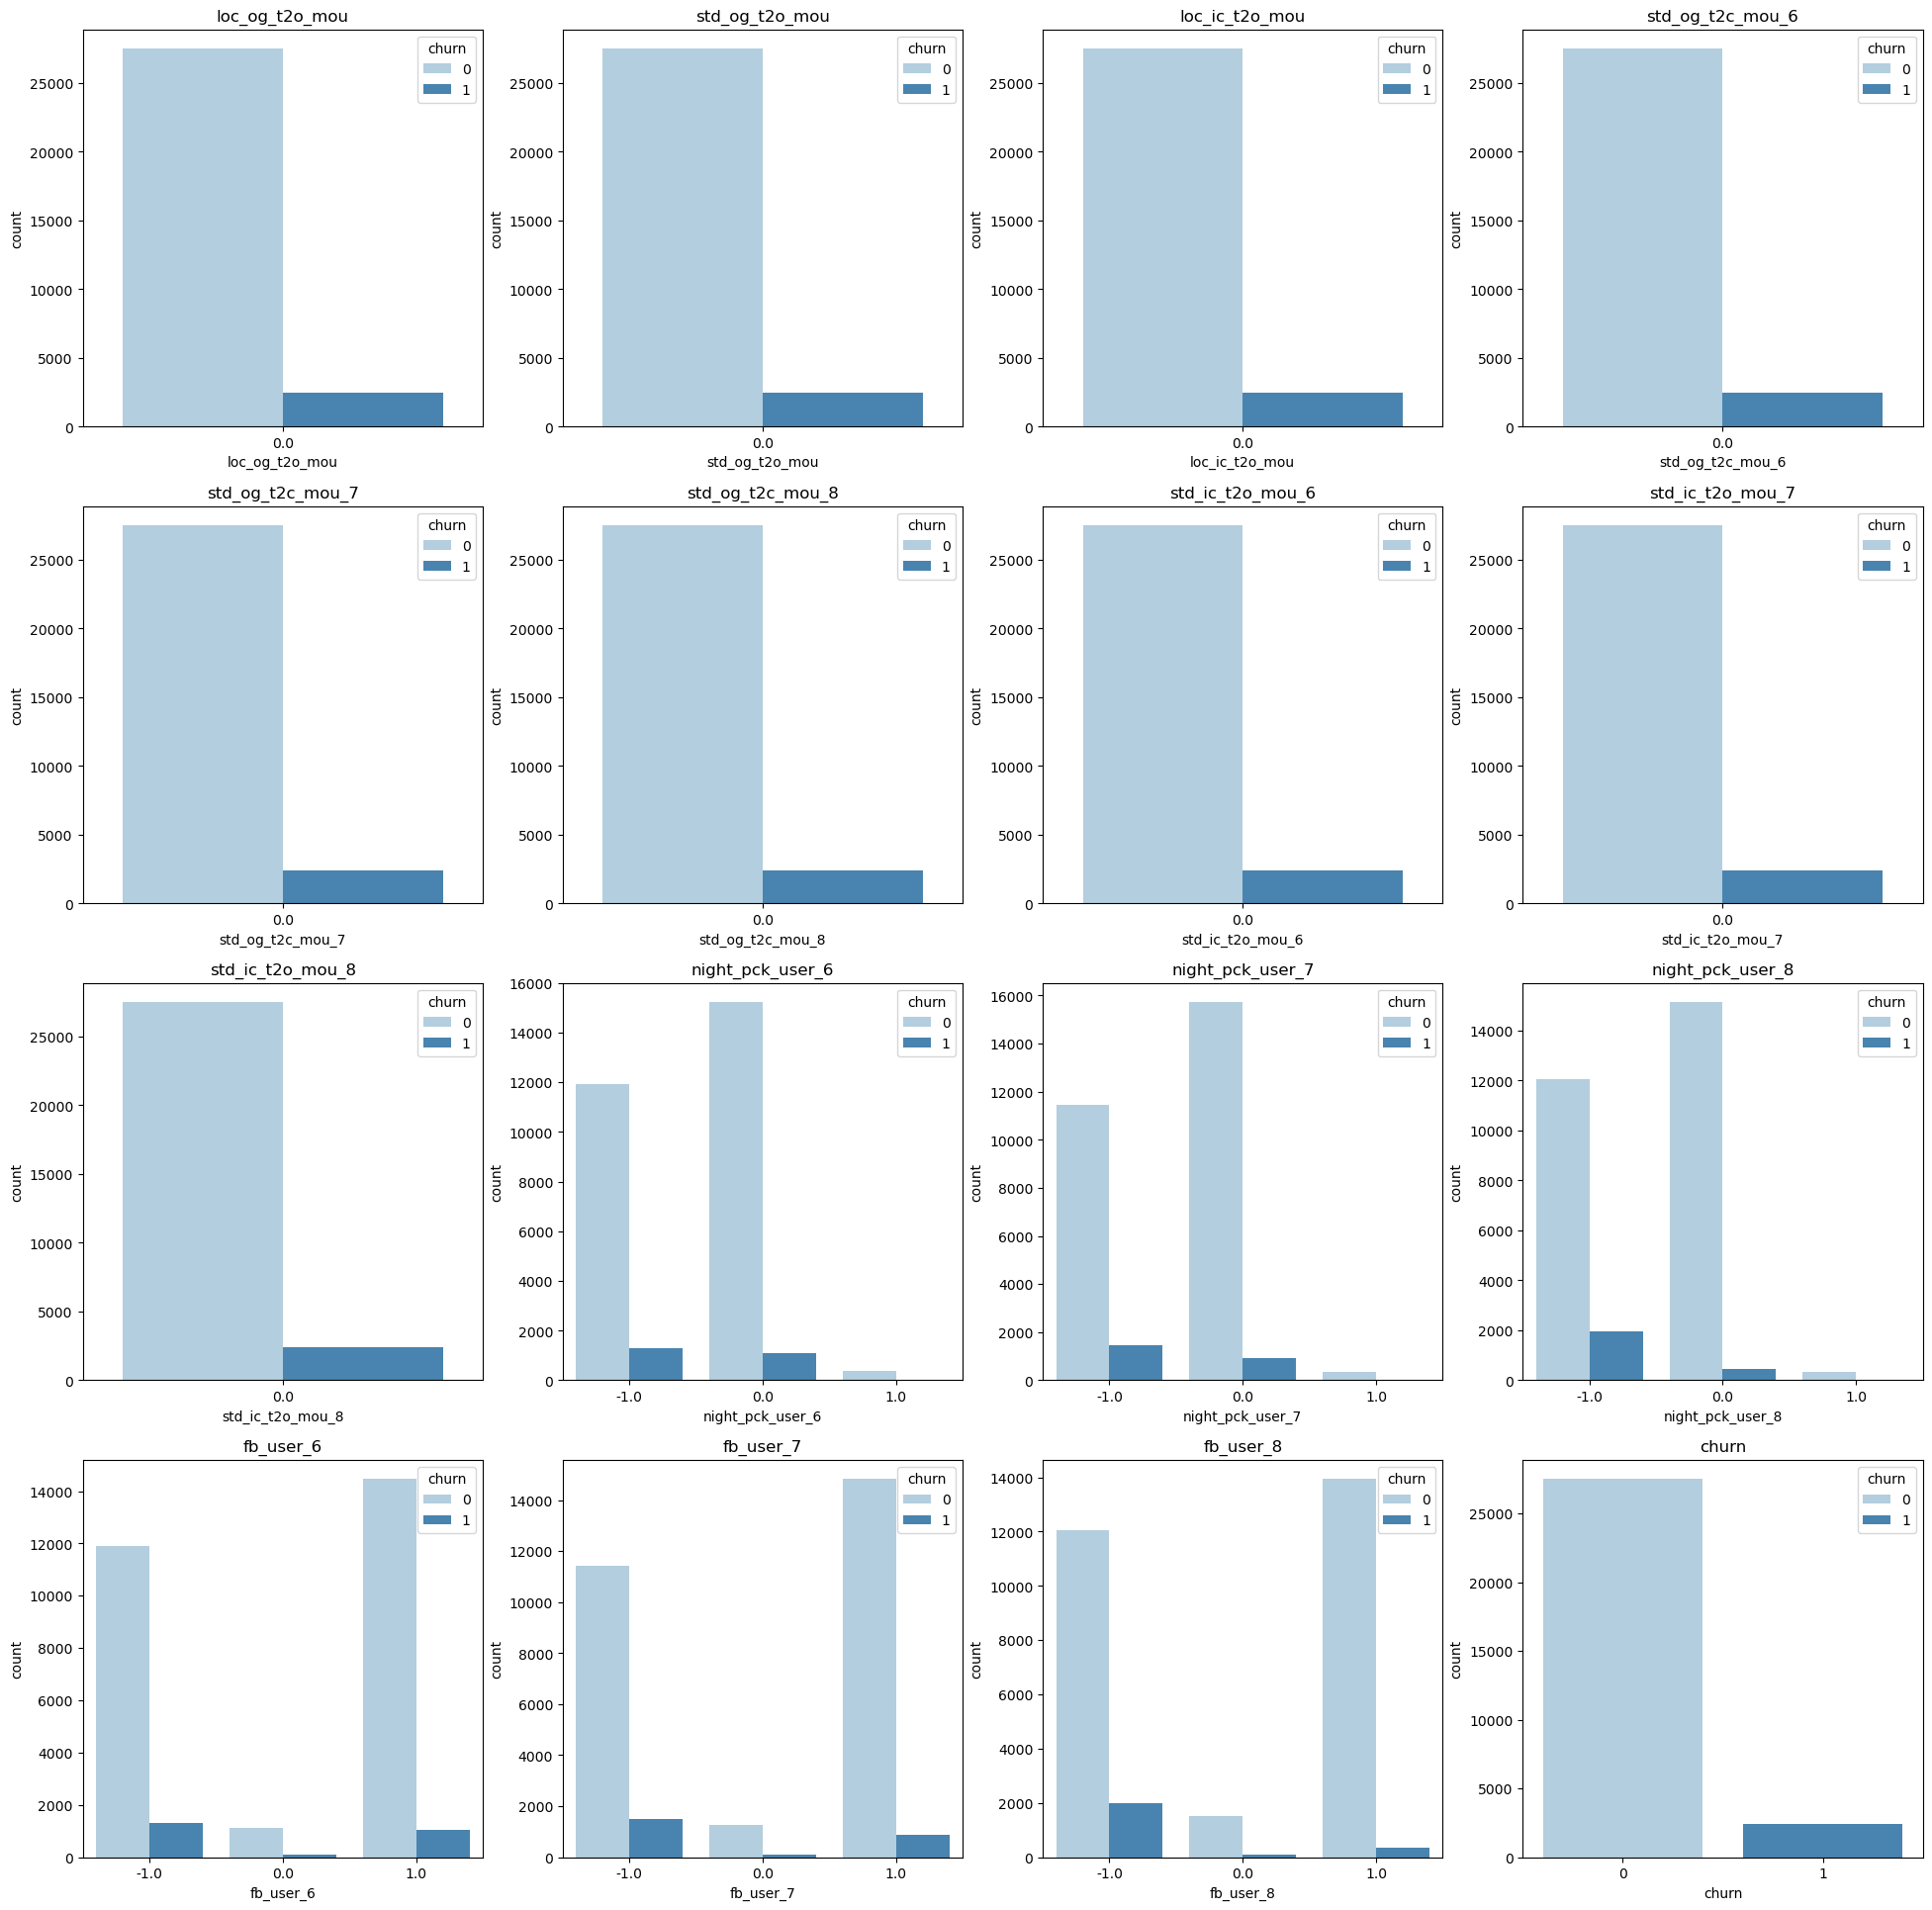

<Figure size 640x480 with 0 Axes>

In [62]:
# Plotting countplot for the categorical columns
plt.figure(figsize=(24, 24))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=col, data=df_high_val, hue='churn', palette = 'Blues')
    plt.title(col)

plt.show()
plt.subplots_adjust(wspace=1.5, hspace=1.5)

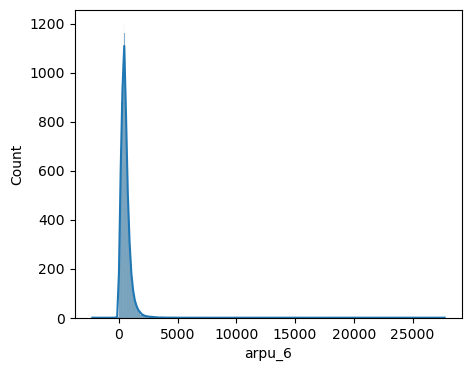

In [63]:
# Visualizing the numerical columns

plt.figure(figsize=[5,4])
sns.histplot(df_high_val['arpu_6'], kde=True)
plt.show()

In [64]:
df_high_val[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,roam_ic_mou_diff,offnet_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,total_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_ic_mou_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,299

## Bivariate Analysis

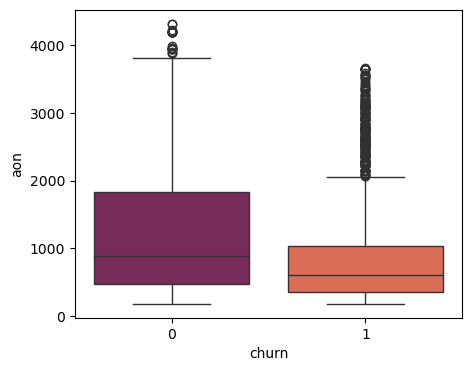

In [66]:
# plotting a boxplot for age of network
plt.figure(figsize=[5,4])
sns.boxplot(x = df_high_val.churn, y = df_high_val.aon , palette='rocket' )
plt.show()

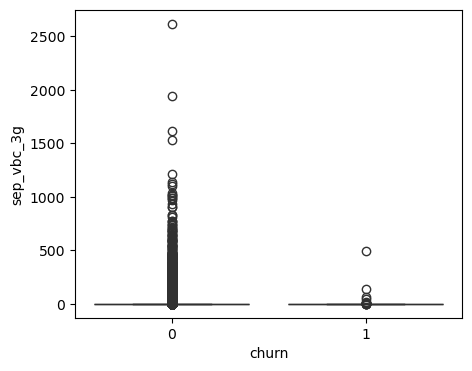

In [67]:
# plotting a boxplot for sep_vbc_3g
plt.figure(figsize=[5,4])
sns.boxplot(x = df_high_val.churn, y = df_high_val.sep_vbc_3g , palette='rocket' )
plt.show()

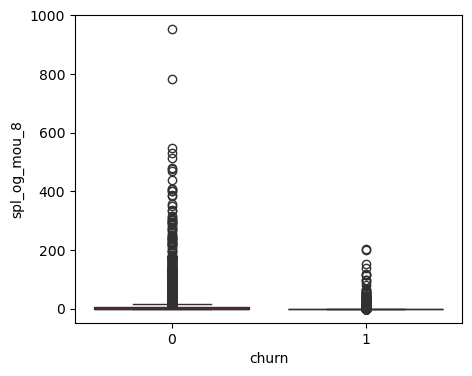

In [68]:
# plotting a boxplot  mintues of usage special outgoing call
plt.figure(figsize=[5,4])
sns.boxplot(x = df_high_val.churn, y = df_high_val.spl_og_mou_8 , palette='rocket' )
plt.show()

>### Observation:
>> - There are several numerical columns having outliers so we need to cap them.
>> - Here we will use k-sigma method for capping the variables

### K-sigma Method for Capping

In [71]:
# creating user define function for capping the outliers for the numerical columns
def cap_outliers(arr, k=3):
    upper_limit = arr.mean() + k*arr.std()
    lower_limit = arr.mean() - k*arr.std()
    arr[arr<lower_limit] = lower_limit
    arr[arr>upper_limit] = upper_limit
    return arr

In [72]:
# # capping the outliers for num cols
df_high_val[num_cols] = df_high_val[num_cols].apply(cap_outliers, axis=0)

# <strong> 6. Data Preparation

In [74]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [75]:
# splitting the data into train and test
X = df_high_val.drop('churn', axis=1)
y = df_high_val['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4, stratify=y)

In [76]:
# Checking the shape of the train and test data
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(22464, 172) (22464,)
(7489, 172) (7489,)


In [77]:
# Checking the churn rate in train and test data
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

churn
0    0.918759
1    0.081241
Name: proportion, dtype: float64
churn
0    0.918814
1    0.081186
Name: proportion, dtype: float64


In [78]:
# removing target variable(churn) from cat_cols
cat_cols = cat_cols[:-1]

In [79]:
X_train[cat_cols].nunique()

loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
night_pck_user_6    3
night_pck_user_7    3
night_pck_user_8    3
fb_user_6           3
fb_user_7           3
fb_user_8           3
dtype: int64

In [80]:
# here we will use mean encoding for the categorical columns because the class -1 is missing values and it is not a separate class
# so we will use mean encoding for the categorical columns
df_train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(df_train.groupby('night_pck_user_6').churn.mean())
print(df_train.groupby('night_pck_user_7').churn.mean())
print(df_train.groupby('night_pck_user_8').churn.mean())
print(df_train.groupby('fb_user_6').churn.mean())
print(df_train.groupby('fb_user_7').churn.mean())
print(df_train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.099286
 0.0    0.066011
 1.0    0.102236
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.115083
 0.0    0.055387
 1.0    0.065517
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141152
 0.0    0.028973
 1.0    0.027132
Name: churn, dtype: float64
fb_user_6
-1.0    0.099286
 0.0    0.076087
 1.0    0.066190
Name: churn, dtype: float64
fb_user_7
-1.0    0.115083
 0.0    0.063063
 1.0    0.054985
Name: churn, dtype: float64
fb_user_8
-1.0    0.141152
 0.0    0.062857
 1.0    0.025074
Name: churn, dtype: float64


In [81]:
# replace categories with aggregated values in each categorical column
mapping = {
    'night_pck_user_6': {-1.0: 0.097785, 0.0: 0.067537, 1.0: 0.091216},
    'night_pck_user_7': {-1.0: 0.113452, 0.0: 0.056869, 1.0: 0.058394},
    'night_pck_user_8': {-1.0: 0.141327, 0.0: 0.028488, 1.0: 0.028000},
    'fb_user_6':        {-1.0: 0.097785, 0.0: 0.080420, 1.0: 0.067164},
    'fb_user_7':        {-1.0: 0.113452, 0.0: 0.067236, 1.0: 0.056025},
    'fb_user_8':        {-1.0: 0.141327, 0.0: 0.067901, 1.0: 0.024021}
}

X_train.replace(mapping, inplace=True)
X_test.replace(mapping, inplace=True)

In [82]:
# updating the numerical columns
num_cols = num_cols + ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']  

In [83]:
# Checking the stats of the train data
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,roam_ic_mou_diff,offnet_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,total_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_ic_mou_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,22464.0,22464.0,22464.0,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.0,22464.0,22464.0,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.0,22464.0,22464.0,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22464.000000,22

In [84]:
# scaling the data
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [85]:
# Checking the stats of the train data
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,roam_ic_mou_diff,offnet_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,total_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_ic_mou_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,total_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,22464.0,22464.0,22464.0,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,22464.0,22464.0,22464.0,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,22464.0,22464.0,22464.0,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.246400e+04,2.

>### Observation:
>> - The data has been successfully prepared, and we are now ready to proceed with model building.

# <strong> 7. Model Building

In [88]:
# importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import sensitivity_specificity_support

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## PCA - Principal Component Analysis

In [90]:
# applying PCA on the train data
pca = PCA()
pca.fit(X_train)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

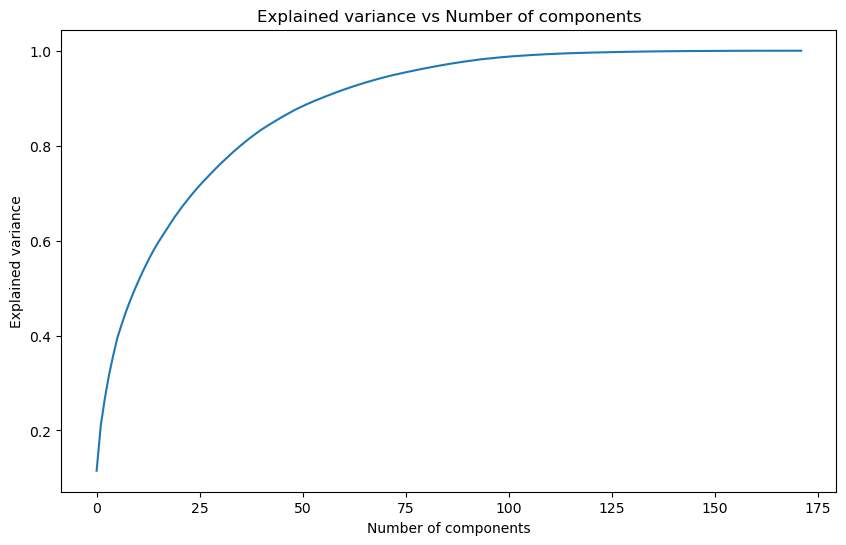

In [91]:
# Plotting the scree plot
var_cum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(var_cum)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance vs Number of components')
plt.show()

In [92]:
pd.DataFrame(var_cum*100 , index=range(1, len(var_cum)+1), columns=['Explained Variance'])

,Explained Variance
1,11.515515
2,20.991599
3,26.789971
4,31.665816
5,35.709874
6,39.399134
7,42.135103
8,44.739175
9,47.037152
10,49.187816


>### Observation:
>> - Approximately 55 components explains 90% of the variance
>> - Approximately 75 components explains 95% of the variance

## PCA with Logistic Regression

In [95]:
# Applying PCA with 55 components with Logistic Regression
# creating a pipeline
components = 55

pipeline = Pipeline([
    ('pca', PCA(n_components= components)),
    ('log_reg', LogisticRegression(class_weight='balanced' , random_state=42))
])

In [96]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8118322649572649

### Prediction on Test Data

In [98]:
# Predictions on test data
y_pred = pipeline.predict(X_test)

# Printing the accuracy score
print("Accuracy : " ,accuracy_score(y_test, y_pred))

# Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

# Printing the Sensitivity and Specificity
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)

# Printing AUC ROC score
y_pred_proba = pipeline.predict_proba(X_test)[:,1]
print("AUC ROC Score : ", roc_auc_score(y_test, y_pred_proba))

Accuracy :  0.8135932701295233
Confusion Matrix : 
 [[5585 1296]
 [ 100  508]]
Sensitivity :  0.8355263157894737
Specificity :  0.8116552826624037
AUC ROC Score :  0.8975061955499125


### Hyperparameter tuning

In [100]:
# Hyperparameter tuning for Logistic Regression
# Creating a pipeline
pca_log = Pipeline([
    ('pca', PCA()),
    ('log_reg', LogisticRegression(class_weight={0:0.1, 1: 0.9}, random_state=42))
])

# Creating a parameter grid
params = {
    'pca__n_components': [55,58,60,62,65,67,69,70,71,73,75,77,80],
    'log_reg__C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2],
    'log_reg__penalty': ['l1', 'l2']
}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_log, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [101]:
# fitting the model

model.fit(X_train, y_train)

Fitting 5 folds for each of 182 candidates, totalling 910 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('log_reg',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2],
                         'log_reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [55, 58, 60, 62, 65, 67, 69, 70,
                                               71, 73, 75, 77, 80]},
             scoring='roc_auc', verbose=1)

In [102]:
# cross validation results
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,param_log_reg__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.570720,0.034229,0.064046,0.008363,0.1,l2,69,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.882370,0.895659,0.899831,0.891424,0.884374,0.890732,0.006602,1
45,0.473577,0.025087,0.053248,0.004908,0.2,l2,69,"{'log_reg__C': 0.2, 'log_reg__penalty': 'l2', ...",0.882517,0.895470,0.899885,0.891055,0.884630,0.890711,0.006497,2
71,0.507509,0.030085,0.053515,0.002887,0.3,l2,69,"{'log_reg__C': 0.3, 'log_reg__penalty': 'l2', ...",0.882585,0.895381,0.899879,0.890910,0.884789,0.890709,0.006434,3
97,0.524601,0.033930,0.057993,0.003854,0.4,l2,69,"{'log_reg__C': 0.4, 'log_reg__penalty': 'l2', ...",0.882620,0.895317,0.899881,0.890832,0.884862,0.890702,0.006403,4
123,0.597659,0.030175,0.063924,0.007349,0.5,l2,69,"{'log_reg__C': 0.5, 'log_reg__penalty': 'l2', ...",0.882664,0.895272,0.899876,0.890781,0.884908,0.890700,0.006376,5
175,0.644598,0.045490,0.062571,0.006158,2.0,l2,69,"{'log_reg__C': 2, 'log_reg__penalty': 'l2', 'p...",0.882732,0.895087,0.899913,0.890729,0.885005,0.890693,0.006325,6
149,0.489397,0.039081,0.060223,0.022343,1.0,l2,69,"{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'p...",0.882696,0.895139,0.899900,0.890725,0.884977,0.890687,0.006343,7
20,0.538380,0.019485,0.051444,0.001315,0.1,l2,70,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.882238,0.894980,0.899705,0.891401,0.883954,0.890456,0.006583,8
46,0.498719,0.038788,0.053696,0.002989,0.2,l2,70,"{'log_reg__C': 0.2, 'log_reg__penalty': 'l2', ...",0.882399,0.894694,0.899794,0.891066,0.884261,0.890443,0.006463,9
176,0.577813,0.031662,0.059235,0.006507,2.0,l2,70,"{'log_reg__C': 2, 'log_reg__penalty': 'l2', 'p...",0.882565,0.894321,0.899823,0.890807,0.884631,0.890429,0.006309,10


In [103]:
# Best parameters
model.best_params_

{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', 'pca__n_components': 69}

In [104]:
# Best Model
best_model = model.best_estimator_

In [105]:
# Predictions on test data
y_pred = best_model.predict(X_test)

# Printing the accuracy score
print("Accuracy : " ,accuracy_score(y_test, y_pred))

# Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

# Printing the Sensitivity and Specificity
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)

# Printing AUC ROC score
y_pred_proba = best_model.predict_proba(X_test)[:,1]
print("AUC ROC Score : ", roc_auc_score(y_test, y_pred_proba))

Accuracy :  0.8520496728535185
Confusion Matrix : 
 [[5886  995]
 [ 113  495]]
Sensitivity :  0.8141447368421053
Specificity :  0.8553989245749164
AUC ROC Score :  0.9007253956355792


>### Observation:
>> - Hyperparameter tuning, improved the model's accuracy (from 81.56% to 85.16%) and specificity (from 81.34% to 85.48%), while slightly reducing sensitivity (from 84.05% to 81.58%). The AUC also saw a minor improvement (from 0.898 to 0.901).

## Random Forest Classifier

In [108]:
# Random Forest Classifier
random_forest = RandomForestClassifier(class_weight= {1:0.9 , 0:0.1}, random_state=42 , oob_score=True)

# hyperparameter tuning
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=random_forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

%time
# fitting the model
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [109]:
# Best parameters
print(model.best_params_)

# Best Model
best_model = model.best_estimator_

{'criterion': 'entropy', 'max_features': 0.4}


In [110]:
# Predictions on test data
y_pred = best_model.predict(X_test)

# Printing the accuracy score
print("Accuracy : " ,accuracy_score(y_test, y_pred))

# Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

# Printing the Sensitivity and Specificity
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)

# Printing AUC ROC score
y_pred_proba = best_model.predict_proba(X_test)[:,1]
print("AUC ROC Score : ", roc_auc_score(y_test, y_pred_proba))

Accuracy :  0.9455200961410068
Confusion Matrix : 
 [[6795   86]
 [ 322  286]]
Sensitivity :  0.47039473684210525
Specificity :  0.9875018165964249
AUC ROC Score :  0.9299882542699577


>### Observation:
>> - We observed very poor sensitivity with the Random Forest model, making PCA with Logistic Regression a more effective choice for this task.

## Selecting  Best Features

In [113]:
# Running a Random forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1, n_jobs=-1)

In [114]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1, oob_score=True,
                       random_state=4, verbose=1)

In [115]:
# OOB score
rf_model.oob_score_

0.9427083333333334

In [116]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[[6804   77]
 [ 349  259]]
Sensitivity: 	0.43
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


### Feature Importance

In [118]:
importance = rf_model.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({'Features' : features , 'Importance_Percent' : importance*100})
feature_importance_df = feature_importance_df.sort_values(by='Importance_Percent' , ascending=False).reset_index(drop=True)
feature_importance_df['Cumulative_sum'] = np.cumsum(feature_importance_df.Importance_Percent)
feature_importance_df

,Features,Importance_Percent,Cumulative_sum
0,total_ic_mou_8,6.576731,6.576731
1,total_og_mou_8,4.077149,10.653880
2,loc_ic_t2m_mou_8,3.205817,13.859697
3,arpu_8,3.147307,17.007004
4,max_rech_amt_8,3.144219,20.151223
5,last_day_rch_amt_8,3.015345,23.166569
6,total_rech_amt_diff,2.967804,26.134372
7,arpu_diff,2.712793,28.847165
8,total_og_mou_diff,2.215140,31.062305
9,loc_ic_mou_8,2.025228,33.087533


### Selecting Top 30 important Features

In [120]:
# Extracting top 30 features
top_features = feature_importance_df.Features[:30]


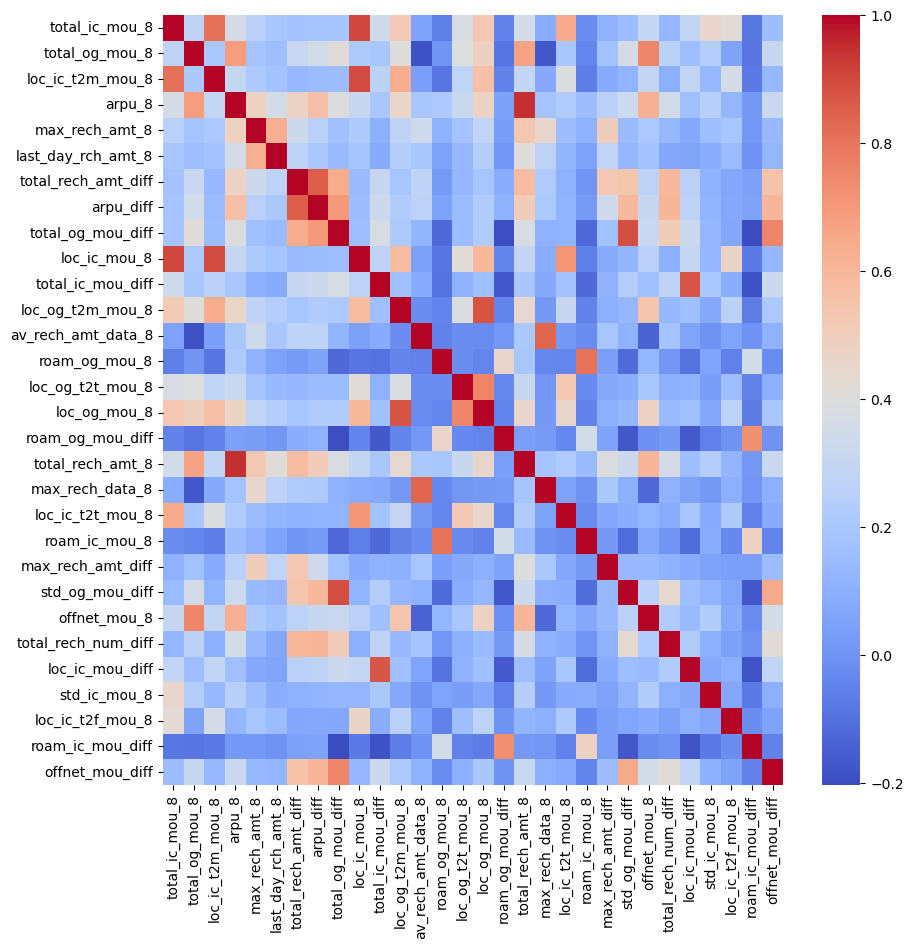

In [121]:
# Plotting a heatmap for top 30 features
plt.figure(figsize=[10,10])
sns.heatmap(X_train[top_features].corr() , cmap = 'coolwarm')
plt.show()

>### Observation:
>> - There are several columns having high correlation.
>> - So we will select top 10 features using RFE to avoid multicolinearity

## RFE (Recursive Feature Elimination)

In [124]:
# importing RFE
from sklearn.feature_selection import RFE

In [125]:
# Fittting a Logistic regression model on RFE

log_reg = LogisticRegression(class_weight={0:0.1, 1:0.9})

rfe = RFE(estimator=log_reg , n_features_to_select=10 )
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
    n_features_to_select=10)

In [126]:
# Selecting Top 10 
cols = X_train.columns[rfe.support_]

In [127]:
X_train = X_train[cols]
X_test = X_test[cols]

## Logistic Regression

In [129]:
# Creating pipeline
logistic = Pipeline([('scaler', StandardScaler()), 
                     ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
                    ])

# hyperparameter tuning
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [130]:
# fitting model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [131]:
# print best hyperparameters
best_model =  model.best_score_
print("Best hyperparameters: ", model.best_params_)


Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [132]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5728 1153]
 [ 126  482]]
Sensitivity: 	0.79
Specificity: 	0.83
ROC:    	 0.87


In [133]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [134]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [135]:
# coefficients
coefficients = logistic_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [136]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,loc_og_mou_8,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_8,total_og_mou_6,total_og_mou_8,total_ic_mou_8,sep_vbc_3g,std_og_mou_diff,total_og_mou_diff
0,-1.6729,2.680488,-0.122016,0.991319,4.674367,-1.302183,-5.420786,-1.129023,-1.272182,1.188892,-2.204339


>### Observation:
>> - 'log_og_mou_8' is contributing positively to our model so it is an important feature to predict the churners
>> - 'total_og_mou_8' is contributing Negatively to the model

# <strong> 8. Recommendations

## **Key Insights & Recommendations**

**1. Optimize Roaming Charges & Offers**
- Customers using services from roaming zones may be experiencing **high costs**, leading to potential churn.
- Introduce **competitive roaming plans** with better rates and benefits to retain these customers.
- Offer **region-specific discounts** for frequent travelers to encourage continued usage.

**2. Review STD & ISD Pricing**
- High **STD (long-distance) and ISD (international) call rates** might be discouraging customers from using these services.
- Introduce **affordable STD and ISD packages** to make long-distance calls more accessible.
- Provide **special bundled offers** for customers making frequent national or international calls.

**3. Improve Customer-Centric Service Approach**
- Collect and analyze **customer complaints and queries** to identify pain points related to pricing, service quality, and connectivity.
- Implement **data-driven service improvements** based on customer feedback to enhance satisfaction and retention.
- Ensure **quick resolution of issues** by setting up a proactive customer support system.

By addressing these key areas, the telecom company can enhance customer satisfaction, reduce churn, and drive long-term loyalty.
